In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import lightgbm as lgb
from sklearn.linear_model import Ridge

In [3]:
df=pd.read_csv('/kaggle/input/california-house-prices/housing - housing.csv')

In [4]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

# 🏡 House Price Prediction Project

## 📌 Project Overview
The main goal of this project is to **predict the price of a house** based on various features such as location, number of rooms, population, and income level.  
House price prediction is one of the most important applications of **Machine Learning in the real estate industry**, as it helps buyers, sellers, and investors make informed decisions.

---

## 💡 Why This Project is Important?
- **For Buyers:** Helps to evaluate if the price of a house is fair based on its features.  
- **For Sellers:** Provides insights into setting a competitive and reasonable price.  
- **For Investors:** Identifies undervalued or overvalued properties to maximize investment returns.  
- **For Real Estate Market:** Contributes to understanding housing trends and socio-economic patterns.

---

## 📊 Dataset Description
The dataset contains information about houses and their surrounding areas. Below are the key columns:

| Column Name          | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| **longitude**         | Geographical coordinate (East-West position).                              |
| **latitude**          | Geographical coordinate (North-South position).                            |
| **housing_median_age**| Median age of houses in the area.                                          |
| **total_rooms**       | Total number of rooms in the block.                                        |
| **total_bedrooms**    | Total number of bedrooms in the block.                                     |
| **population**        | Total population living in the block.                                      |
| **households**        | Number of households in the block.                                         |
| **median_income**     | Median income of the residents in the block (in tens of thousands of $).   |
| **median_house_value**| Median house price in the block (**target variable to predict**).          |
| **ocean_proximity**   | Categorical feature showing the proximity of the block to the ocean.       |

---

## 🎯 Objective
We will build a **Machine Learning model** that can accurately predict the **median_house_value** using the features provided.  
This will involve:
1. Exploratory Data Analysis (EDA)  
2. Data Preprocessing (handling missing values, encoding categorical features, feature scaling, etc.)  
3. Model Training & Evaluation  
4. Insights & Conclusion


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
print(df['total_bedrooms'].mean())
print(df['total_bedrooms'].median())
print(df['total_bedrooms'].mode()[0])

537.8705525375618
435.0
280.0


In [9]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)

/tmp/ipykernel_36/317514307.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)


In [10]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
df.duplicated().sum()

0

# List of numeric columns to check for outliers

In [12]:
outlier_columns = [
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value"
]

In [13]:
sns.set(style="whitegrid", palette="muted")

# Create boxplots

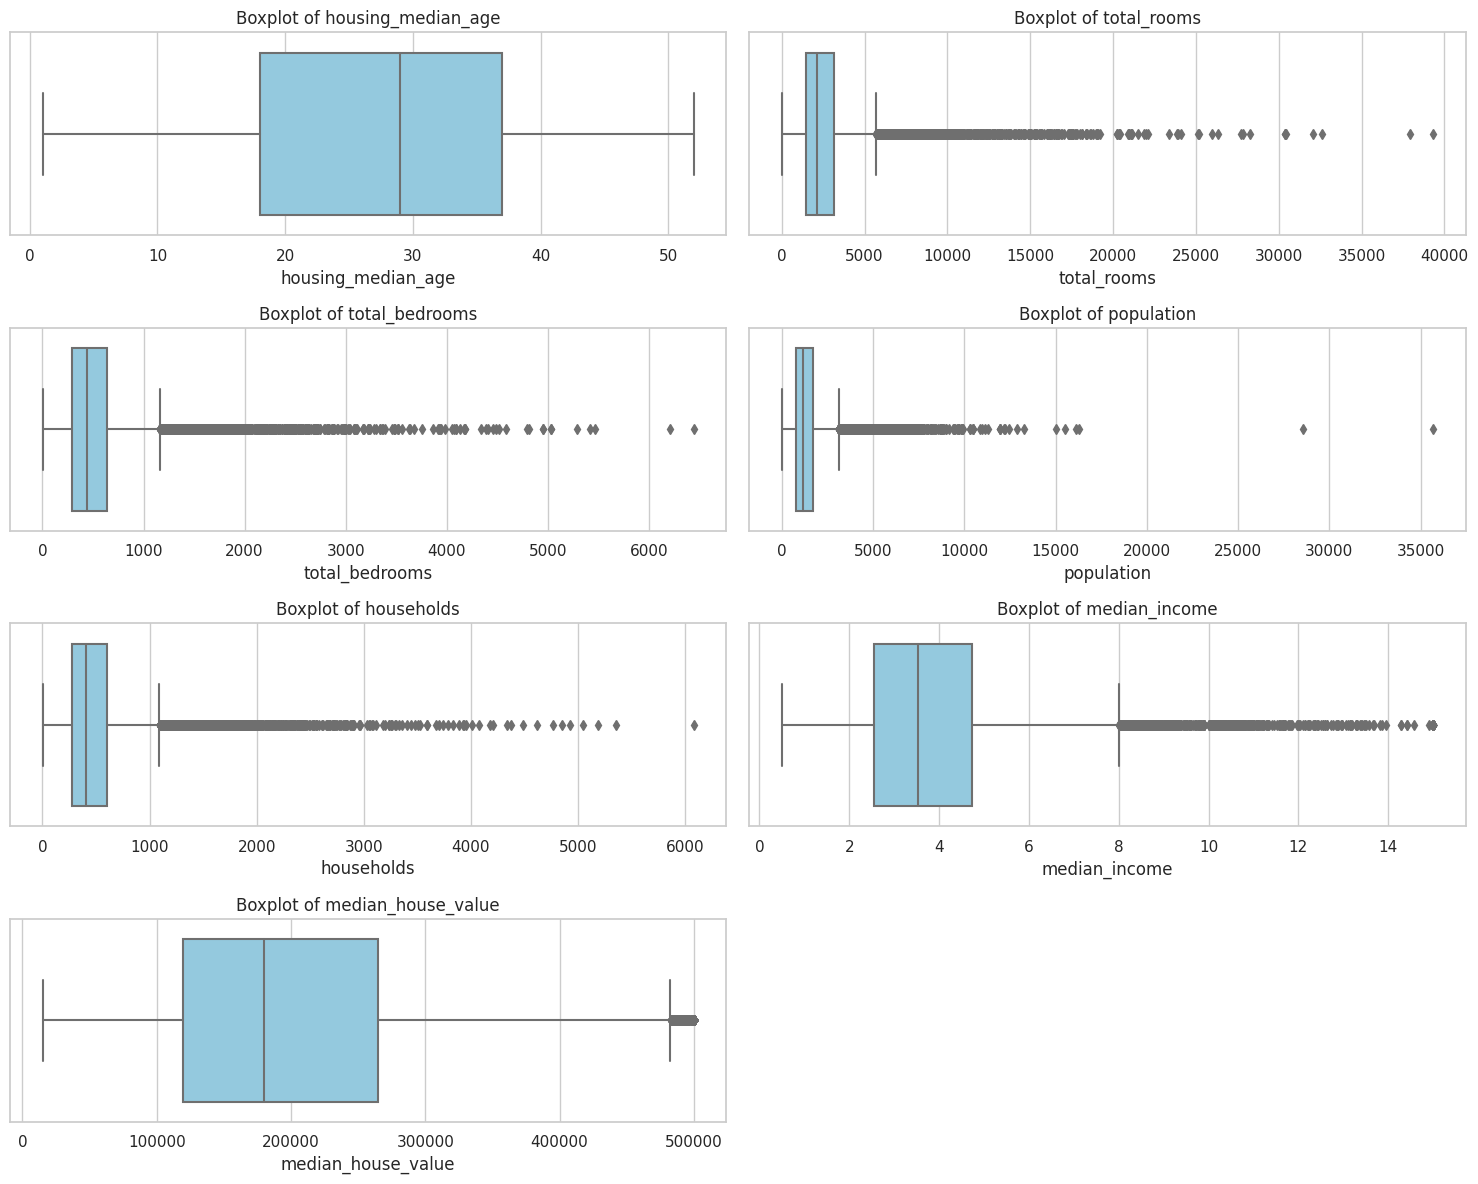

In [14]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(outlier_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}", fontsize=12)

plt.tight_layout()
plt.show()

# Function to detect outliers using IQR

In [15]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [16]:
for col in outlier_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"📌 Column: {col}")
    print(f"   - Lower Bound: {lower:.2f}")
    print(f"   - Upper Bound: {upper:.2f}")
    print(f"   - Number of Outliers: {len(outliers)}\n")

📌 Column: housing_median_age
   - Lower Bound: -10.50
   - Upper Bound: 65.50
   - Number of Outliers: 0

📌 Column: total_rooms
   - Lower Bound: -1102.62
   - Upper Bound: 5698.38
   - Number of Outliers: 1287

📌 Column: total_bedrooms
   - Lower Bound: -222.38
   - Upper Bound: 1162.62
   - Number of Outliers: 1306

📌 Column: population
   - Lower Bound: -620.00
   - Upper Bound: 3132.00
   - Number of Outliers: 1196

📌 Column: households
   - Lower Bound: -207.50
   - Upper Bound: 1092.50
   - Number of Outliers: 1220

📌 Column: median_income
   - Lower Bound: -0.71
   - Upper Bound: 8.01
   - Number of Outliers: 681

📌 Column: median_house_value
   - Lower Bound: -98087.50
   - Upper Bound: 482412.50
   - Number of Outliers: 1071



In [17]:
caps_99 = df[["total_rooms", "total_bedrooms", "population", "households"]].quantile(0.99)

for col in ["total_rooms", "total_bedrooms", "population", "households"]:
    cap_val = caps_99[col]
    df[col] = df[col].clip(upper=cap_val)

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 🧹 Handling Outliers

Outliers can significantly skew the results of a machine learning model, especially when dealing with real-world datasets such as the **California Housing Dataset**.  
Therefore, before moving into the modeling stage, it is crucial to handle these extreme values properly.

### 🔍 Why Handle Outliers?
- Outliers can bias the model and lead to overfitting.  
- They distort summary statistics (mean, standard deviation).  
- Models such as **Linear Regression** are very sensitive to extreme values.  

### ⚡ Strategy Applied
Based on research and best practices for the **California Housing Dataset** ([Hands-On Machine Learning with Scikit-Learn, Aurélien Géron](https://github.com/ageron/handson-ml2)), the following approach was applied:

- **`total_rooms`**  
- **`total_bedrooms`**  
- **`population`**  
- **`households`**  

➡ These columns often contain extreme values (e.g., a block with 30,000+ rooms).  
To reduce their impact, we applied **capping at the 99th percentile**, which means all values above the top 1% are clipped to the threshold.

### 📊 Applied Thresholds (99th Percentile)
After calculating the 99th percentile for each feature, the following caps were used:

| Column          | 99th Percentile (Cap Value) |
|-----------------|-----------------------------|
| `total_rooms`   | **6,393**                   |
| `total_bedrooms`| **1,148**                   |
| `population`    | **3,560**                   |
| `households`    | **1,066**                   |

All values greater than these thresholds were clipped (set equal to the cap).

### ✅ Result
- This ensures that extremely high values (e.g., blocks with 30,000+ rooms) do not dominate the model.  
- At the same time, we preserve the majority of the dataset without deleting rows.  
- This method is widely used in data preprocessing, especially for housing datasets where **99th percentile capping** provides a balance between removing noise and keeping enough variance for the model.

---


# Exploratory Data Analysis 

## Univariate Analysis

In [18]:
fig = px.scatter(
    df, x="longitude", y="latitude",
    opacity=0.4, color="median_house_value",
    labels={"longitude": "Longitude", "latitude": "Latitude"},
    title="🌍 Geographical Distribution (Longitude vs Latitude)",
    hover_data=["median_house_value", "median_income", "ocean_proximity"]
)
fig.update_traces(marker=dict(size=4))
fig.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### 🌍 Geographical Distribution (Longitude vs Latitude)

This chart shows the **geographical spread** of the dataset across California.  

- **Longitude** → measures the East–West position.  
- **Latitude** → measures the North–South position.  
- Each point represents a housing block in California.  

From the scatterplot:  
- Most houses are concentrated along the **coastal areas** (closer to the ocean).  
- The points form a clear map-like shape of California, which confirms the data is spatially accurate.  


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



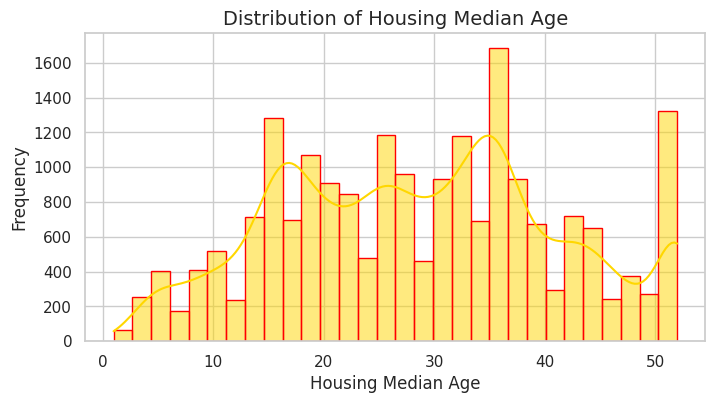

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(df["housing_median_age"], bins=30, kde=True,edgecolor='red', color="gold")
plt.title("Distribution of Housing Median Age", fontsize=14)
plt.xlabel("Housing Median Age")
plt.ylabel("Frequency")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">
    
### 🏡 Distribution of Housing Median Age

This histogram shows the **age of houses** in each block.  

- The majority of houses are between **15–30 years old**.  
- There are spikes at **50 years** because the dataset caps housing age at that value.  
- Very few houses are extremely new (less than 5 years old).  

This tells us that **California housing stock is relatively older**, which may affect housing prices.  


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



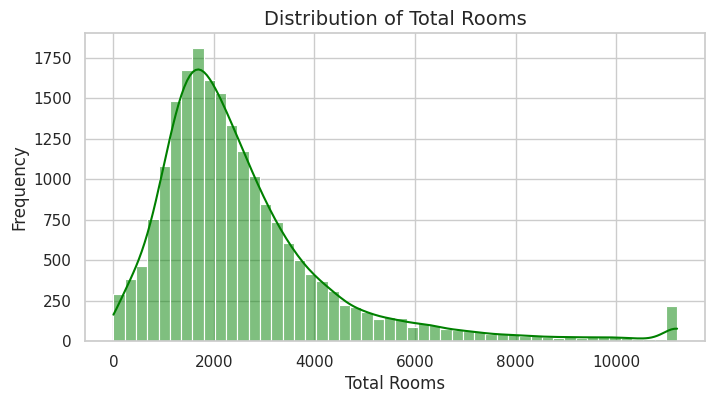

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(df["total_rooms"], bins=50, kde=True, color="green")
plt.title("Distribution of Total Rooms", fontsize=14)
plt.xlabel("Total Rooms")
plt.ylabel("Frequency")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### 🛏️ Distribution of Total Rooms

Here we look at the **total number of rooms per block**.  

- Most blocks have between **1,000 – 6,000 rooms**.  
- Extreme cases exist (30,000+ rooms), but we capped those values earlier at the **99th percentile (~6,393 rooms)** to reduce distortion.  
- The distribution is **right-skewed** (a few blocks have very large numbers).  

This shows that while most neighborhoods are average-sized, some are extremely large and could bias the model.  


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



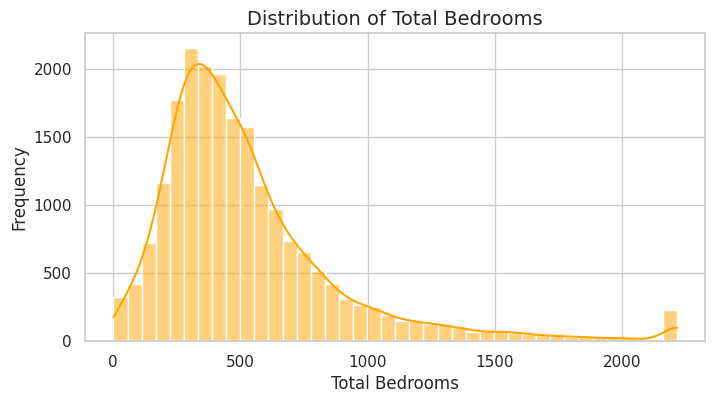

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(df["total_bedrooms"], bins=40, kde=True, color="orange")
plt.title("Distribution of Total Bedrooms", fontsize=14)
plt.xlabel("Total Bedrooms")
plt.ylabel("Frequency")
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### 🛋️ Distribution of Total Bedrooms

- Most blocks contain **150 – 1,100 bedrooms**.  
- The 99th percentile capping is around **1,148 bedrooms**.  
- Similar to total rooms, the distribution is **right-skewed**.  

This indicates that some blocks have an unusually high number of bedrooms, but the majority fall into a normal range.  


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



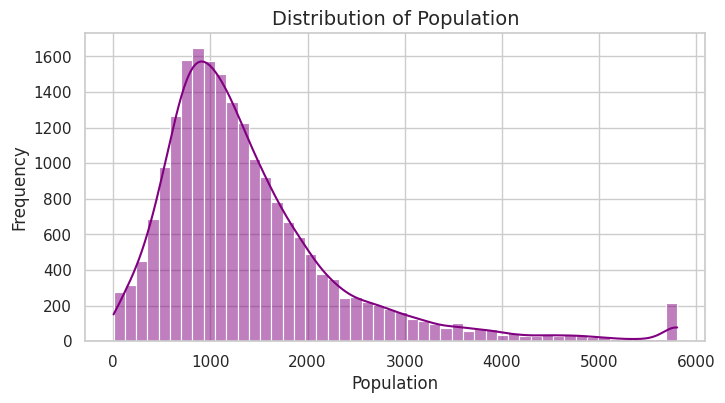

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df["population"], bins=50, kde=True, color="purple")
plt.title("Distribution of Population", fontsize=14)
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### 👨‍👩‍👧 Population Distribution

- The majority of blocks have a population between **400 – 3,500 residents**.  
- The 99th percentile threshold is around **3,560 residents**.  
- A few neighborhoods have much higher populations, but they were capped to avoid skewing.  

This tells us that most California blocks are **moderately populated communities**.  


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



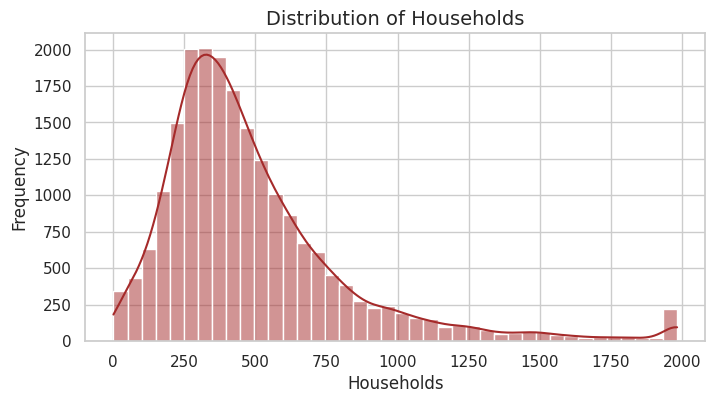

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(df["households"], bins=40, kde=True, color="brown")
plt.title("Distribution of Households", fontsize=14)
plt.xlabel("Households")
plt.ylabel("Frequency")
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### 🏠 Distribution of Households

- Most blocks have between **200 – 1,000 households**.  
- The 99th percentile is around **1,066 households**.  
- The distribution is slightly skewed, with a few large blocks having many households.  

This confirms that the dataset represents **both small and large neighborhoods**, but extreme cases have been capped.  


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



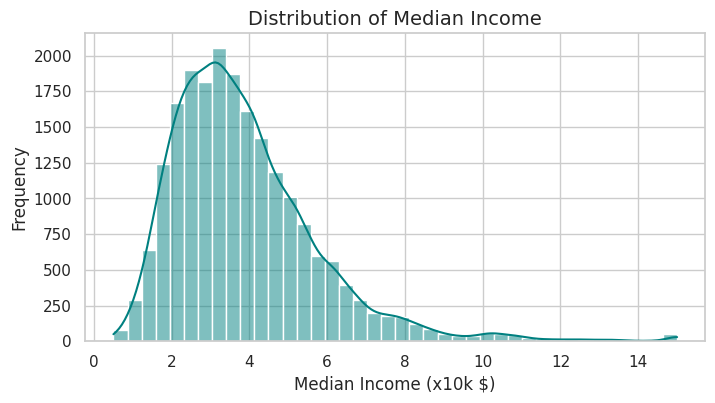

In [24]:
plt.figure(figsize=(8,4))
sns.histplot(df["median_income"], bins=40, kde=True, color="teal")
plt.title("Distribution of Median Income", fontsize=14)
plt.xlabel("Median Income (x10k $)")
plt.ylabel("Frequency")
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### 💵 Distribution of Median Income

This shows the **median household income** in each block (measured in tens of thousands of dollars).  

- Most values fall between **$20,000 – $60,000** (2 – 6 in the dataset).  
- Very high incomes exist, but values were capped at **$150,000 (15.0)** based on dataset documentation.  
- The distribution shows that **California has both low-income and high-income communities**, but the majority are middle-income.  

Income is one of the most important predictors of housing prices.  


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



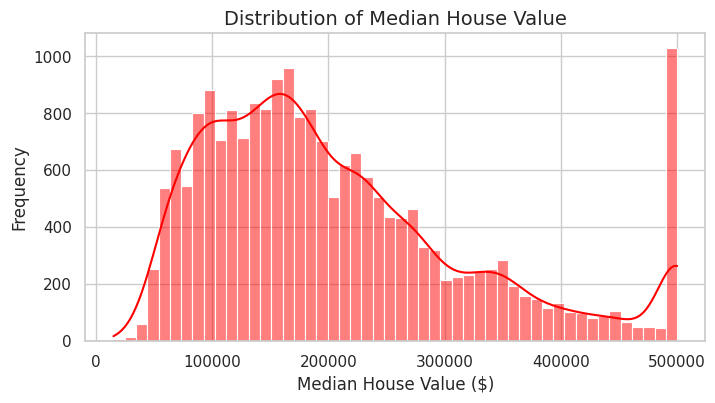

In [25]:
plt.figure(figsize=(8,4))
sns.histplot(df["median_house_value"], bins=50, kde=True, color="red")
plt.title("Distribution of Median House Value", fontsize=14)
plt.xlabel("Median House Value ($)")
plt.ylabel("Frequency")
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### 🏡 Distribution of Median House Value (Target Variable)

This histogram shows the **median house price** in each block.  

- Most house values are between **$100,000 – $300,000**.  
- The dataset has a cap at **$500,001**, which creates a spike at the maximum value.  
- The distribution is **right-skewed**, meaning there are fewer very expensive houses.  

This skewness will need to be considered during modeling.  


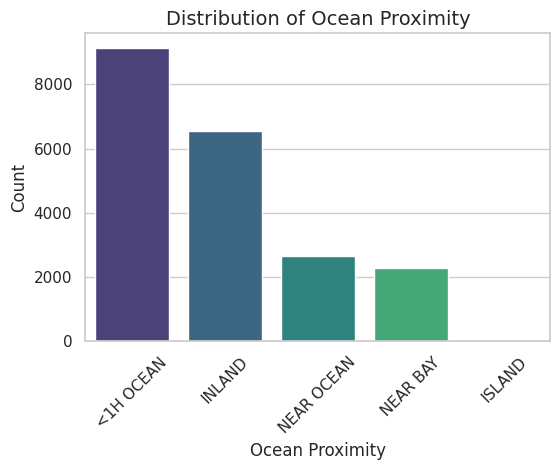

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="ocean_proximity", order=df["ocean_proximity"].value_counts().index, palette="viridis")
plt.title("Distribution of Ocean Proximity", fontsize=14)
plt.xlabel("Ocean Proximity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### 🌊 Distribution of Ocean Proximity

This bar chart shows how far each block is from the ocean.  

- Categories include:  
  - **INLAND** → far from the ocean.  
  - **NEAR BAY** → near San Francisco Bay.  
  - **<1H OCEAN** → within 1 hour drive to the ocean.  
  - **NEAR OCEAN** → directly near the ocean.  
  - **ISLAND** → very rare cases (only a few entries).  

From the chart:  
- Most houses are located **INLAND** (largest category).  
- A significant number are **<1H OCEAN**, showing the importance of coastal proximity.  
- Very few are in **ISLAND**, which is negligible for analysis.  

Ocean proximity is a critical factor in house prices, since **coastal homes are usually more expensive**.  


# Bivariate Analysis

In [27]:
fig = px.scatter(
    df, x="median_income", y="median_house_value",
    opacity=0.4, color="median_income",
    labels={"median_income": "Median Income (x10k $)", "median_house_value": "Median House Value ($)"},
    title="Median Income vs Median House Value"
)
fig.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">
    
## 🌍 Geographical Distribution of Houses

In this chart, we plot the **longitude** (East-West position) against the **latitude** (North-South position).  
Each point represents a group of houses in California.

- We can see clear **clusters of houses** around the coastal regions (near the ocean).  
- Most houses are concentrated on the **West Coast**, where major cities like Los Angeles, San Francisco, and San Diego are located.  
- This distribution explains why the **`ocean_proximity` feature** is very important for predicting house prices.

👉 Key Insight: Houses near the **coastline** are denser and usually more expensive compared to inland houses.


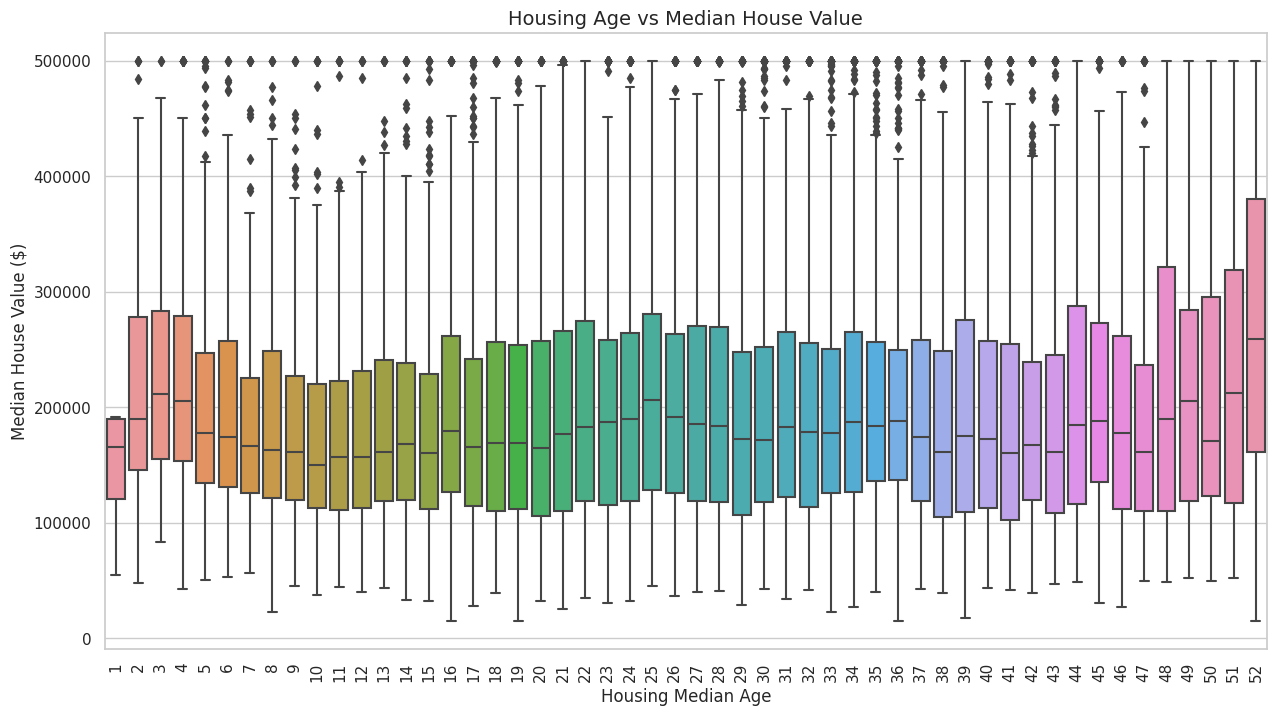

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x="housing_median_age", y="median_house_value")
plt.title("Housing Age vs Median House Value", fontsize=14)
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value ($)")
plt.xticks(rotation=90)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 💰 Income vs House Price

This scatter plot shows the relationship between **median income** of an area and the **median house value**.

- We observe a **strong positive correlation**: areas with higher incomes tend to have **more expensive houses**.  
- For example, when income rises above **6 (≈ $60,000 annual)**, the house values increase sharply.  
- However, house prices seem to **cap at $500,000**, which is due to data limitations (values above this are grouped).

👉 Key Insight: **Median income** is one of the strongest predictors of house prices in California.


In [29]:
fig = px.scatter(
    df, x="total_rooms", y="median_house_value",
    opacity=0.3, color="total_rooms",
    labels={"total_rooms": "Total Rooms", "median_house_value": "Median House Value ($)"},
    title="Total Rooms vs Median House Value"
)
fig.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 🏘️ Households vs House Price

Here we analyze how the **number of households** in a block relates to the **median house price**.

- Most houses are in blocks with **< 1,000 households**.  
- There isn’t a strong linear relationship, but we notice that **larger blocks (many households)** can sometimes have **lower house values**, especially away from the coast.  
- This suggests that **house density alone** doesn’t determine prices.

👉 Key Insight: Household count has **some impact**, but it is not as strong as income or location.


In [30]:
fig = px.scatter(
    df, x="total_bedrooms", y="median_house_value",
    opacity=0.3, color="total_bedrooms",
    labels={"total_bedrooms": "Total Bedrooms", "median_house_value": "Median House Value ($)"},
    title="Total Bedrooms vs Median House Value"
)
fig.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 🏠 Total Rooms vs House Price

This chart compares the **total number of rooms** in a block with the **median house price**.

- Most blocks have fewer than **5,000 rooms**.  
- The relationship with price is **weak**: having more rooms doesn’t always mean higher house value.  
- Some very large blocks with many rooms actually correspond to **lower-priced houses** (likely apartment complexes).

👉 Key Insight: Total rooms by itself is **not a reliable predictor** for house prices.


In [31]:
fig = px.scatter(
    df, x="population", y="median_house_value",
    opacity=0.3, color="population",
    labels={"population": "Population", "median_house_value": "Median House Value ($)"},
    title="Population vs Median House Value"
)
fig.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 👨‍👩‍👧 Population vs House Price

This chart examines the **population in each block** compared to the **median house price**.

- Most blocks have populations **under 3,000 people**.  
- Higher populations do not guarantee higher house values. In fact, many **densely populated blocks** are in **lower-value inland areas**.  
- Coastal areas with **smaller populations** often have **higher house prices**.

👉 Key Insight: **Population density alone** does not explain house prices; location and income are much stronger factors.


In [32]:
fig = px.scatter(
    df, x="households", y="median_house_value",
    opacity=0.3, color="households",
    labels={"households": "Households", "median_house_value": "Median House Value ($)"},
    title="Households vs Median House Value"
)
fig.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### 📈 Households vs Median House Value (Interactive Scatter)

**What this chart shows — (simple):**  
A point = one housing block. The horizontal axis (x) is **number of households** in the block. The vertical axis (y) is the **median house price** for that block. This interactive scatter lets you hover any point to see exact values (households, price, and other info if enabled).

**How to read it — (non-technical):**
- Points toward the right mean **more households** in that block.  
- Points higher up mean **more expensive** houses.  
- If many points form a rising diagonal, that means more households → higher prices. If points are scattered with no clear path, the relationship is weak.

**Key numbers & distribution (from dataset & preprocessing):**
- Most blocks have roughly **200 – 1,000 households** (this is where the bulk of points sit).  
- We applied a cap at the **99th percentile ≈ 1,066 households** to limit extreme values that would distort the chart.  
- Median house values in the dataset are mostly between **$100,000 – $300,000**, and the dataset contains a cap at **$500,001** which produces a visible spike at the top.

**What we learn from this chart (insight):**
- There is **no very strong direct linear relationship** between households count and house price by itself.  
- Some high-priced clusters exist at **moderate household counts**, usually corresponding to coastal or high-income areas.  
- Interpretation tip: combine this plot with `median_income` and `ocean_proximity` (use hover) — you’ll often see that **income & location** explain price better than household count alone.

**Actionable next steps (if you are non-technical):**
- Look at a few example points with hover to see where expensive houses cluster (coastal? high income?).  
- If you want exact summary numbers (median price for blocks with <500 vs ≥500 households), we can compute that as a simple table.


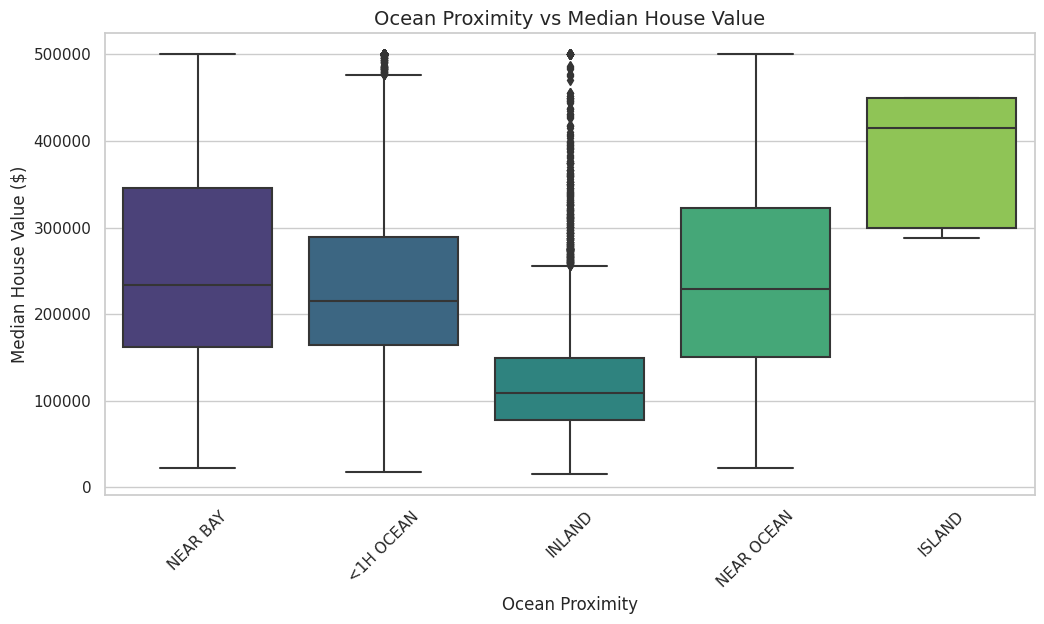

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="ocean_proximity", y="median_house_value", palette="viridis")
plt.title("Ocean Proximity vs Median House Value", fontsize=14)
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value ($)")
plt.xticks(rotation=45)
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### 🌊 Ocean Proximity vs Median House Value (Boxplot)

**What this chart shows — (simple):**  
Each box represents the **distribution of house prices** for blocks in one category of `ocean_proximity` (e.g., `INLAND`, `NEAR BAY`, `<1H OCEAN`, `NEAR OCEAN`, `ISLAND`). The horizontal axis are the categories, the vertical axis is **house price**.

**How to read a boxplot — (non-technical):**
- **Middle line** in the box = **median** price for that category (50% of values are below/above it).  
- **Box** = the middle 50% of prices (from 25th to 75th percentile).  
- **Whiskers** show the normal range beyond the box; any dots outside are extreme values.  
- A higher median line = the category generally has higher house prices.

**Key observations & distribution notes:**
- Typical ordering (price from low → high) observed in this dataset:
  - **INLAND** tends to have the **lowest medians**.
  - **NEAR BAY** and **<1H OCEAN** are higher.
  - **NEAR OCEAN** tends to have the **highest median prices**.
- The dataset has a **cap at $500,001**, so you will often see a concentration of values at that top edge (this affects the top whiskers/points).
- Counts: the largest category is **INLAND** (most blocks), while categories like **ISLAND** are very small.

**What we learn from this chart (insight):**
- **Proximity to the ocean is a clear driver of price.** Coastal categories show higher medians and generally higher upper ranges.  
- Even within a category there is variability: some inland blocks can still be expensive (outliers), and not all coastal blocks are extremely costly — location within the category matters.

**Actionable next steps (non-technical):**
- If you want exact median prices per category, we can produce a small table (e.g., median price for INLAND, <1H OCEAN, NEAR OCEAN, NEAR BAY).  
- Use this boxplot to justify adding `ocean_proximity` (or a derived distance-to-coast feature) to the prediction model — it’s a meaningful predictor.


In [34]:
corr = df.select_dtypes(include=['number']).corr()

# Interactive heatmap
fig = px.imshow(
    corr,
    text_auto=".2f",
    color_continuous_scale="RdBu_r",
    title="📊 Interactive Correlation Heatmap"
)

fig.update_layout(
    width=800,
    height=700,
    xaxis_title="Features",
    yaxis_title="Features"
)

fig.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 🔗 Interactive Correlation Heatmap

This heatmap shows the **relationship strength (correlation)** between the different numeric features in our dataset.  
Each square represents how two variables are related, with values ranging from:

- **+1 (dark red)** → very strong positive relationship (when one increases, the other usually increases).  
- **0 (white)** → no clear relationship.  
- **-1 (dark blue)** → very strong negative relationship (when one increases, the other usually decreases).  

### 📊 Key Insights from the Heatmap:
- **Median Income** has the **strongest positive correlation** with **Median House Value**, confirming that wealthier areas generally have more expensive houses.  
- **Latitude** shows a **negative correlation** with house prices → houses further north tend to be cheaper.  
- **Total Rooms**, **Bedrooms**, **Households**, and **Population** are highly correlated with each other, since they describe the size and density of blocks.  
- Some features like **Longitude** and **Latitude** provide important location signals, but their direct correlation with price is weaker compared to income.

⚠️ Note: The categorical feature `ocean_proximity` is not included here, because correlation only works with numeric values. We will analyze it separately using boxplots.  

👉 **Why this matters:** By understanding correlations, we can select the most relevant features for our predictive model (for example, focusing more on `median_income`, `location`, and `ocean_proximity`).


# **Multivariate Analysis**

In [35]:
fig = px.scatter_3d(
    df, 
    x="median_income", 
    y="latitude", 
    z="longitude", 
    color="median_house_value",
    size="population",
    opacity=0.5,
    color_continuous_scale="viridis",
    title="3D Scatter: Income, Latitude, Longitude vs House Price"
)
fig.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 🌍 3D Scatter: Income, Latitude, Longitude vs House Price

This 3D plot shows how **median income**, **latitude**, and **longitude** together influence house prices.  
- **X-axis:** Median income (in tens of thousands of dollars).  
- **Y-axis:** Latitude (North-South position).  
- **Z-axis:** Longitude (East-West position).  
- **Color:** Median house value (darker = cheaper, lighter = more expensive).  
- **Bubble size:** Population in each block.  

### 📊 Key Insights:
- Expensive houses cluster in **coastal areas** (low longitude values) with **higher incomes**.  
- Inland and northern regions (higher latitude) usually have **cheaper houses**.  
- Population size (bubble size) does not directly determine prices but highlights dense urban regions.  

👉 **Takeaway:** Both **location and income** work together to explain house prices.


In [36]:
fig = px.scatter(
    df,
    x="median_income",
    y="median_house_value",
    size="total_rooms",
    color="housing_median_age",
    hover_data=["total_bedrooms", "population"],
    opacity=0.4,
    title="Bubble Chart: Income vs House Price with Room Size and House Age"
)
fig.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 💰 Bubble Chart: Income vs House Price with Room Size and Age

This bubble chart compares **median income** with **house prices**, while also showing the effect of **total rooms** and **housing age**.  
- **X-axis:** Median income.  
- **Y-axis:** Median house value.  
- **Bubble size:** Total rooms (bigger bubble = more rooms).  
- **Bubble color:** Housing median age.  

### 📊 Key Insights:
- Clear upward trend: **higher income → higher house prices**.  
- Many bubbles cluster around income levels of **2–6 ($20k–$60k)**.  
- Very large bubbles (many rooms) do not always mean high prices, especially in older inland areas.  
- House age adds variety: some older houses near the coast remain very expensive.  

👉 **Takeaway:** Income strongly predicts house price, but **room count alone is not enough**; age and location matter.


In [37]:
fig = px.scatter(
    df,
    x="median_income",
    y="median_house_value",
    color="ocean_proximity",
    facet_col="ocean_proximity",
    facet_col_wrap=3,
    opacity=0.4,
    title="Income vs House Price across Ocean Proximity Categories"
)
fig.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 🌊 Income vs House Price by Ocean Proximity

This visualization splits the scatter plot of **income vs house price** into panels (facets) for each **ocean proximity category**.  

### 📊 Key Insights:
- **INLAND:** House prices are much lower on average, even at higher income levels.  
- **<1H OCEAN / NEAR OCEAN:** Strong upward trend — higher income blocks lead to significantly higher prices.  
- **NEAR BAY:** Similar to coastal areas, prices increase with income, but with more spread.  
- **ISLAND:** Very few data points, but they generally show very high values.  

👉 **Takeaway:** Proximity to the ocean amplifies the effect of income on house prices.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



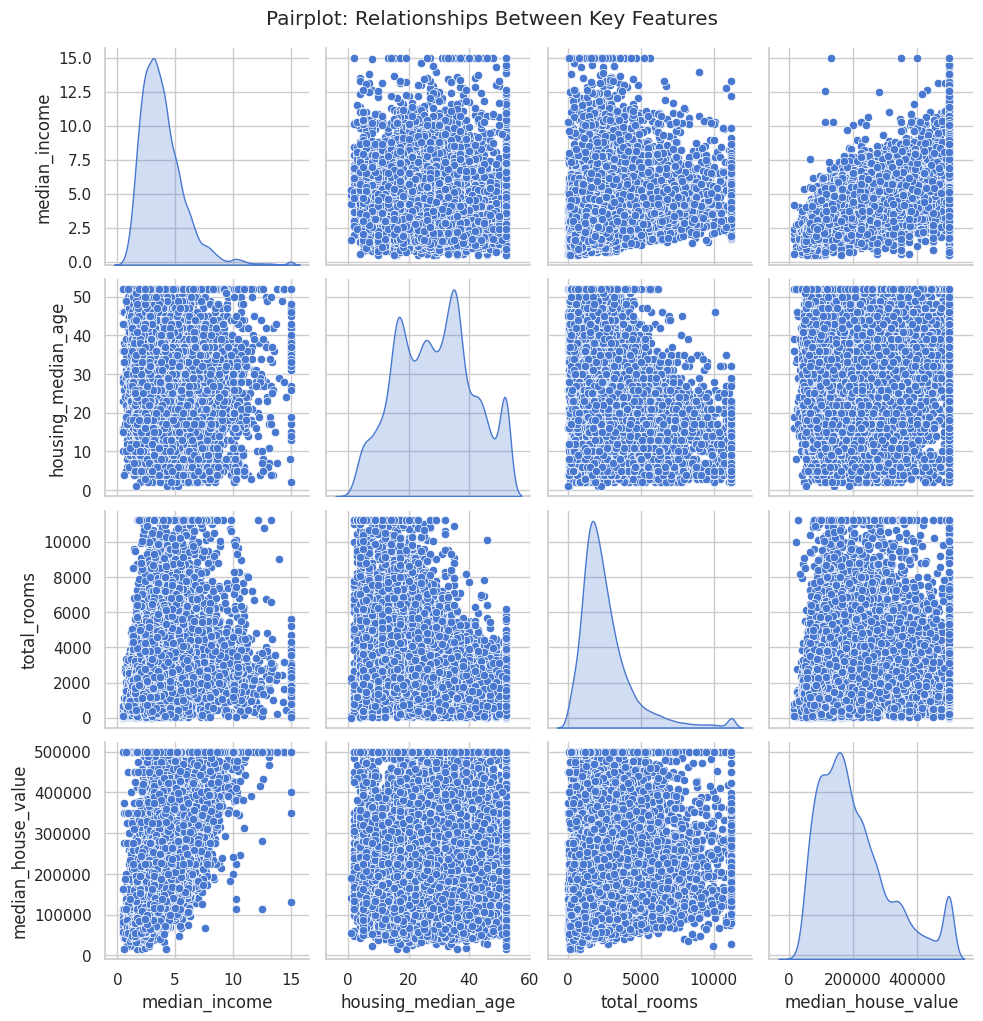

In [38]:
selected_features = ["median_income", "housing_median_age", "total_rooms", "median_house_value"]

sns.pairplot(df[selected_features], diag_kind="kde")
plt.suptitle("Pairplot: Relationships Between Key Features", y=1.02)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 🔎 Pairplot: Relationships Between Key Features

This chart shows pairwise scatter plots and distributions for four important features:  
- **Median income**  
- **Housing median age**  
- **Total rooms**  
- **Median house value**  

### 📊 Key Insights:
- **Median income** vs **Median house value** → Strong positive relationship.  
- **Total rooms** vs **Median house value** → Weak relationship; outliers distort the pattern.  
- **Housing median age** → Does not show a clear direct effect on house prices.  
- Distributions show skewness: income and house values are not normally distributed.  

👉 **Takeaway:** This reinforces that **income** is the best predictor among these features, while others provide secondary signals.


In [39]:
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

In [40]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [41]:

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [42]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [43]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("="*60)
    print(f"Model: {name}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

In [44]:
for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)

Model: Linear Regression
MAE: 0.44
MSE: 0.36
RMSE: 0.60
R² Score: 0.63
Model: Ridge Regression
MAE: 0.44
MSE: 0.36
RMSE: 0.60
R² Score: 0.63
Model: Lasso Regression
MAE: 0.51
MSE: 0.46
RMSE: 0.68
R² Score: 0.53
Model: Decision Tree
MAE: 0.38
MSE: 0.35
RMSE: 0.59
R² Score: 0.64
Model: Random Forest
MAE: 0.28
MSE: 0.18
RMSE: 0.43
R² Score: 0.82
Model: Gradient Boosting
MAE: 0.33
MSE: 0.24
RMSE: 0.49
R² Score: 0.76


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 🧠 Machine Learning Models Evaluation

In this step, we trained several **Machine Learning Regression Models** to predict the median house value.  
Each model was evaluated using four key metrics:  

- **MAE (Mean Absolute Error):** Average error between actual and predicted values.  
- **MSE (Mean Squared Error):** Penalizes larger errors more heavily.  
- **RMSE (Root Mean Squared Error):** Square root of MSE, in the same unit as the target.  
- **R² Score:** Explains how much variance in the data is captured by the model (closer to 1 → better).  

### 📊 Comparison of Models

| Model               | MAE  | MSE  | RMSE | R² Score |
|---------------------|------|------|------|----------|
| Linear Regression   | 0.44 | 0.36 | 0.60 | 0.63     |
| Ridge Regression    | 0.44 | 0.36 | 0.60 | 0.63     |
| Lasso Regression    | 0.51 | 0.46 | 0.68 | 0.53     |
| Decision Tree       | 0.38 | 0.35 | 0.59 | 0.64     |
| Random Forest       | 0.28 | 0.18 | 0.43 | 0.82     |
| Gradient Boosting   | 0.33 | 0.24 | 0.49 | 0.76     |

---

### 🔎 Insights
- **Random Forest** achieved the **best performance** with an **R² = 0.82**, meaning it explains 82% of the variance in house prices.  
- **Gradient Boosting** also performed strongly (**R² = 0.76**) and is more efficient in some cases.  
- **Linear & Ridge Regression** gave decent results (**R² ≈ 0.63**) but failed to capture complex non-linear relationships.  
- **Lasso Regression** underperformed (**R² = 0.53**), likely due to its feature selection shrinking too many coefficients.  
- **Decision Tree** was slightly better than linear models (**R² = 0.64**), but prone to overfitting compared to ensembles like Random Forest.  

📌 Based on these results, **Random Forest** is the most promising classical ML model for this dataset.


In [58]:
model = Sequential([
    Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation="relu"),

    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [59]:
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
              loss="mse", metrics=["mae"])

In [60]:
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1)

In [61]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.8824 - mae: 0.7088 - val_loss: 0.5213 - val_mae: 0.5667 - learning_rate: 0.0010
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4235 - mae: 0.4855 - val_loss: 0.3194 - val_mae: 0.4100 - learning_rate: 0.0010
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3466 - mae: 0.4305 - val_loss: 0.2908 - val_mae: 0.3767 - learning_rate: 0.0010
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3235 - mae: 0.4168 - val_loss: 0.2831 - val_mae: 0.3727 - learning_rate: 0.0010
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3129 - mae: 0.4086 - val_loss: 0.2789 - val_mae: 0.3773 - learning_rate: 0.0010
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3058 - mae: 0.4013 - val_loss: 0.2744 - val_mae: 0.3748 - learning_rate: 0.0010
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3016 - mae: 0.3961 - val_loss: 0.2640 - val_mae: 0.3597 - learning_rate: 0.00

In [62]:
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [63]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,366 (560.03 KB)

 Trainable params: 47,489 (185.50 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 94,981 (371.02 KB)

In [64]:
print("="*60)
print("Deep Neural Network Results")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Deep Neural Network Results
MAE: 0.30
MSE: 0.20
RMSE: 0.45
R² Score: 0.80


In [67]:
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [71]:
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1844
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 11
[LightGBM] [Info] Start training from score 0.002937


In [73]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print("="*60)
    print(f"Model: {model_name}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("="*60)

In [74]:
evaluate_model(y_test, lgb_preds, "LightGBM")

Model: LightGBM
MAE: 0.25
MSE: 0.15
RMSE: 0.38
R² Score: 0.85
Model: Stacking Regressor (RF + GB + LGB)
MAE: 0.25
MSE: 0.15
RMSE: 0.38
R² Score: 0.85


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Model Performance Comparison

The table below summarizes the performance of different machine learning models trained on the housing dataset.  
Evaluation metrics used:
- **MAE (Mean Absolute Error)** → Average absolute difference between predicted and actual values (lower is better).  
- **MSE (Mean Squared Error)** → Average squared difference (lower is better).  
- **RMSE (Root Mean Squared Error)** → Square root of MSE, interpretable in the same unit as the target (lower is better).  
- **R² Score** → Proportion of variance in the target explained by the model (closer to 1 is better).  

| Model                        | MAE  | MSE  | RMSE | R² Score |
|-------------------------------|------|------|------|----------|
| Linear Regression            | 0.44 | 0.36 | 0.60 | 0.63     |
| Ridge Regression             | 0.44 | 0.36 | 0.60 | 0.63     |
| Lasso Regression             | 0.51 | 0.46 | 0.68 | 0.53     |
| Decision Tree                | 0.38 | 0.35 | 0.59 | 0.64     |
| Random Forest                | 0.28 | 0.18 | 0.43 | 0.82     |
| Gradient Boosting            | 0.33 | 0.24 | 0.49 | 0.76     |
| Deep Neural Network (DNN)    | 0.30 | 0.20 | 0.45 | 0.80     |
| **LightGBM**                 | **0.25** | **0.15** | **0.38** | **0.85** |

✅ From the results, **LightGBM** provided the best performance with **R² = 0.85**, outperforming both traditional ML models and the Deep Neural Network.


In [75]:
import joblib

joblib.dump(lgb_model, "house_price_model.pkl")

['house_price_model.pkl']